In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
# Just in case the Keras defaults aren't as we expect
from keras import backend as K_backend
K_backend.set_image_data_format('channels_last')

In [ ]:
batch_size = 512
num_classes = 10
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28


# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle = True )

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_test /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'val samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])                                     

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))


x_train shape: (48000, 28, 28, 1)
48000 train samples
10000 test samples
12000 val samples
Epoch 1/100
94/94 [==============================] - 1s 10ms/step - loss: 0.5118 - accuracy: 0.8365 - val_loss: 0.1233 - val_accuracy: 0.9625
Epoch 2/100
94/94 [==============================] - 1s 9ms/step - loss: 0.1293 - accuracy: 0.9612 - val_loss: 0.0632 - val_accuracy: 0.9809
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0852 - accuracy: 0.9747 - val_loss: 0.0509 - val_accuracy: 0.9851
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0622 - accuracy: 0.9814 - val_loss: 0.0416 - val_accuracy: 0.9873
Epoch 5/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 6/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0382 - val_accuracy: 0.9892
Epoch 7/100
94/94 [==============================] - 1s 9ms/st

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9917
Test loss: 0.09665989130735397
Test accuracy: 0.9916999936103821


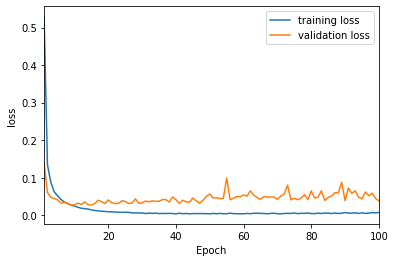

In [ ]:
xs = list(range(1,1+len(history.history['accuracy'])))
plt.plot(xs, history.history['loss'], label='training loss')
plt.plot(xs, history.history['val_loss'], label='validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xlim(1, len(xs))
#file_helper.save_figure('mnist-history')
plt.show()

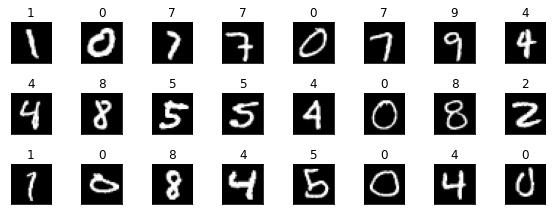

In [ ]:
grid_x = 8
grid_y = 3
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+700
        pred_data = np.reshape(x_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(x_test[img_index],(28,28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
#file_helper.save_figure('mnist-convnet-predictions')
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

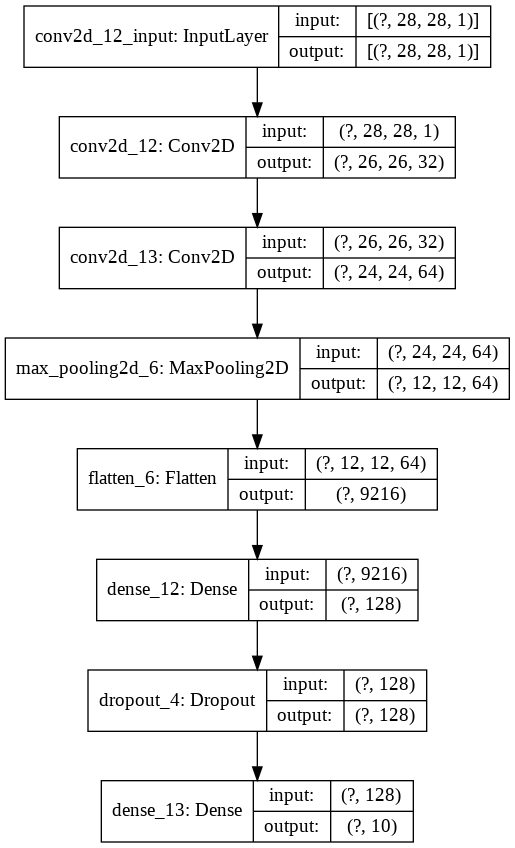

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes= True, show_layer_names=True)